# <center><u>Youtube Analysis using NLP Sentiment Analysis:</u>

## <center><u>Using Selenium getting the videos by inputing the search title Auomation</u>

In [1]:
import numba
from numba import cuda
print(numba.__version__)

import selenium
import warnings
warnings.filterwarnings('ignore')

from selenium import webdriver                    #import webDriver
import warnings 
warnings.filterwarnings('ignore')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')        #remove this for easy debbuing on your laptop /pc
chrome_options.add_argument('--no-sandbox')                             
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


# from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

driver_service = Service(executable_path= "C:\SeleniumDriver\chromedriver.exe")
driver = webdriver.Chrome()
driver.implicitly_wait(10)
# get the url
url = "https://www.youtube.com/"
driver.get(url)
driver.implicitly_wait(30)

search_element = driver.find_element(By.NAME, 'search_query')
search_element.click()
val = input("Enter your search here for analysis:  ")
search_element.send_keys(val + Keys.ENTER)
time.sleep(5)


driver.execute_script("window.scrollTo(0, 70000);")
titles = driver.find_elements(By.XPATH ,'//a[@id="video-title"]')
time.sleep(5)

print(len(titles))

def data(text):
    before_keyword, keyword, after_keyword = text.partition('by')
    list = text.split(' ')
    title = before_keyword.split(' ')[0:3]
    channel = after_keyword.split(' ')[1:2]
    views = (' ').join(list[-2:])

    return {'title': title,'channel':channel, 'views':views}


list = []
for i in range(len(titles)):
    
  dict = data(titles[i].get_attribute('aria-label'))  
  dict["url"] = titles[i].get_attribute('href')
  list.append(dict)

data = pd.DataFrame(list)

0.55.1
Enter your search here for analysis:  iphone 14 pro reviews
27


## <center><u>Cleaning the data to be sorted as top viewed videos:</u>

In [2]:
# printing shape of data:
print("Shape of the extracted video data: ",data.shape)

convert_dict = {'title': str,
                'channel': str}
data.astype(convert_dict)
data['views'] = data['views'].str.replace('views', '')
data['views'] = data['views'].str.replace(',', '')
data['views'] = data['views'].str.replace('play Short', '0')

data['views'] = pd.to_numeric(data['views'], errors= 'coerce')

# get the top video links based on top video views
data.sort_values('views', ascending = False, inplace = True)
print(data)

href = pd.DataFrame(data['url'][0:15]).reset_index()
href.drop(['index'],axis = 1,inplace = True)
print(href)

Shape of the extracted video data:  (27, 4)
                             title        channel    views  \
1                [iPhone, 14, Pro]      [Marques]  9916588   
25  [iPhone, 14/Pro, Impressions:]      [Marques]  8225474   
7              [Apple, iPhone, 14]         [Tech]  5047153   
9                [iPhone, 14, Pro]    [Technical]  3802807   
23           [iPhone, 14,, iPhone]       [Trakin]  3469233   
18               [iPhone, 14, Pro]       [Dave2D]  1507284   
14               [iPhone, 14, Pro]        [megii]  1212444   
8          [The, Ultimate, iPhone]    [Technical]   634918   
10           [Even, Kidney, can’t]      [TechBar]   489178   
11               [iPhone, 14, Pro]         [Gyan]   379772   
26               [iPhone, 14, Pro]       [Nabeel]   284627   
20               [iPhone, 14, Pro]  [Geekyranjit]   261277   
15                 [iPhone, 15, —]       [Arthur]   187236   
17               [iPhone, 14, Pro]        [Happy]   127381   
12               [iPhone, 

## <center><u>Extracting the comments of the Youtube Videos using Selenium</u>

In [5]:
from selenium.webdriver import Chrome
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

comments = []
names = []
likes = []
Days_Ago = []
reply_counts = []

try:
      with Chrome('chromedriver',chrome_options=chrome_options) as driver:
          wait = WebDriverWait(driver, 15)
          driver.get(href['url'][2])

          for item in range(80):
              wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.CONTROL + Keys.END)
              time.sleep(5)
          for name in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,'#header-author'))):
              names.append(name.text)
          for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
              comments.append(comment.text)
          for like in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#vote-count-middle"))):
              likes.append(like.text)
        

except:
    print("Comments not found")


import pandas as pd

df = pd.DataFrame(zip(names, comments, likes),columns=['Names', 'Comments', 'Likes'])
print(df)

                                         Names  \
0     100k challenge with 0 video\n1 month ago   
1                     NoneTheLess\n1 month ago   
2      1K CHALLENGE WITH 2 VIDEOS\n1 month ago   
3                   Iconic Gamerz\n1 month ago   
4                     Sahil Yadav\n1 month ago   
...                                        ...   
1575                    JAY patel\n1 month ago   
1576                   Ravi Kumar\n1 month ago   
1577                   zonja fzal\n1 month ago   
1578                    Raja Babu\n1 month ago   
1579             Real Game Hacker\n1 month ago   

                                               Comments Likes  
0     IN\nSKIP NAVIGATION\nSIGN IN\nView products\n0...    5K  
1                                                         415  
2                                                          11  
3                                                          57  
4                                                         337  
...            

In [6]:
df

,Names,Comments,Likes
0,100k challenge with 0 video\n1 month ago,IN\nSKIP NAVIGATION\nSIGN IN\nView products\n0...,5K
1,NoneTheLess\n1 month ago,,415
2,1K CHALLENGE WITH 2 VIDEOS\n1 month ago,,11
3,Iconic Gamerz\n1 month ago,,57
4,Sahil Yadav\n1 month ago,,337
...,...,...,...
1575,JAY patel\n1 month ago,1600 nits brightness becomes 16000 in you vide...,
1576,Ravi Kumar\n1 month ago,1600 NTS bro,
1577,zonja fzal\n1 month ago,Aapne 1600 nits ko 16000 nits likha hai dono baar,
1578,Raja Babu\n1 month ago,"Mere jese log sirf dekhne aye hai ,acha mobile...",


## <center><u>Cleaning the data & Converting the comments into Date and Time for Analysis</u>

In [7]:
print("Shape of the Comment data: ", df.shape)
print("Visualizing the data ",df)

# Cleaning the comments: 
import numpy as np
arr = np.where(df['Comments'].apply(lambda x : x == ''))
df.drop(index = arr[0], inplace = True)

# splitting the name and old from the Names columns:
# make a new copy of data:
nlp_data = df.copy()
nlp_data = nlp_data['Names'].str.split('\n', expand=True)
nlp_data.rename(columns = {'0': 'Names','1': 'Old'} ,inplace = True)
nlp_data.rename(columns = {0 : 'Names', 1 : 'Old', 'Comments':'Comments' ,'Likes':'Likes' }, inplace = True)
nlp_data['Comments'] = df['Comments']
nlp_data['Likes'] = df['Likes']

# converting dtype of nlp as numeric:
nlp_data['Likes'] = pd.to_numeric(nlp_data['Likes'], errors= 'coerce')

# filling empty likes of comments as 0:
nlp_data['Likes'].fillna(0, inplace = True)

# get the top video links based on top video views
nlp_data.sort_values('Likes', ascending = False, inplace = True)

# resetting the index:
nlp_data.reset_index(inplace = True)
nlp_data.drop(columns = 'index', axis= 1, inplace = True)

# converting the old column to dates: Day, Month and Year:
# Cleaning the old column:
nlp_data['Old'] = nlp_data['Old'].str.replace('(edited)', '')
nlp_data['Old'] = nlp_data['Old'].str.replace("(", '')
nlp_data['Old'] = nlp_data['Old'].str.replace(')', '')


from dateutil.relativedelta import relativedelta
from datetime import datetime
import re 

def ago_do_date(ago):
    value, unit = re.search(r'(\d+) (\w+) ago', ago).groups()
    if not unit.endswith('s'):
        unit += 's'
    delta = relativedelta(**{unit: int(value)})
    return (datetime.now() - delta)

Dates = []
for i in range(len(nlp_data)):
    date = ago_do_date(str(nlp_data["Old"][i]))
    Dates.append(date)

nlp_data['Dates'] = Dates
nlp_data

Shape of the Comment data:  (1580, 3)
Visualizing the data                                           Names  \
0     100k challenge with 0 video\n1 month ago   
1                     NoneTheLess\n1 month ago   
2      1K CHALLENGE WITH 2 VIDEOS\n1 month ago   
3                   Iconic Gamerz\n1 month ago   
4                     Sahil Yadav\n1 month ago   
...                                        ...   
1575                    JAY patel\n1 month ago   
1576                   Ravi Kumar\n1 month ago   
1577                   zonja fzal\n1 month ago   
1578                    Raja Babu\n1 month ago   
1579             Real Game Hacker\n1 month ago   

                                               Comments Likes  
0     IN\nSKIP NAVIGATION\nSIGN IN\nView products\n0...    5K  
1                                                         415  
2                                                          11  
3                                                          57  
4                  

,Names,Old,Comments,Likes,Dates
0,Comedian Vyas,1 month ago,Don't know why I am so excited for a I phone 1...,62.0,2022-09-21 12:58:55.609930
1,EADY,1 month ago,After technical guruji and trakin tech i was ...,56.0,2022-09-21 12:58:55.609930
2,Jitender pal Singh,1 month ago,He never disappoint us he always bring new pro...,39.0,2022-09-21 12:58:55.609930
3,Aishia khan Official,1 month ago,I hope this channel never ends and keeps sprea...,38.0,2022-09-21 12:58:55.609930
4,Elder Vault,1 month ago,He wrote 16000 nits insted of 1600 nits 4:45,38.0,2022-09-21 12:58:55.609930
...,...,...,...,...,...
1549,Abdul Aziz,22 hours ago,"Sir, when you are telling about 1600 nits brig...",0.0,2022-10-20 14:58:55.643272
1550,Mohammed AFAQ,1 month ago,4:50 pr 16000 nits h Yaa 1600 h,0.0,2022-09-21 12:58:55.643272
1551,BR AARIS,3 weeks ago,bhaiya please fresh walls android ke liye bhi ...,0.0,2022-09-30 12:58:55.643272
1552,Tupai Chakraborti,3 weeks ago,"Lack of features, battery life kept me away fr...",0.0,2022-09-30 12:58:55.643272


In [8]:
for d in nlp_data['Dates']:
    nlp_data['Day'] = d.date()
    nlp_data['Time'] = d.time()
    
nlp_data.drop(columns = ['Dates', 'Old'],axis = 1, inplace = True)

nlp_data.to_csv('iphone14_pro_reviewsjup.csv')

In [9]:
nlp_data

,Names,Comments,Likes,Day,Time
0,Comedian Vyas,Don't know why I am so excited for a I phone 1...,62.0,2022-09-21,12:58:55.643272
1,EADY,After technical guruji and trakin tech i was ...,56.0,2022-09-21,12:58:55.643272
2,Jitender pal Singh,He never disappoint us he always bring new pro...,39.0,2022-09-21,12:58:55.643272
3,Aishia khan Official,I hope this channel never ends and keeps sprea...,38.0,2022-09-21,12:58:55.643272
4,Elder Vault,He wrote 16000 nits insted of 1600 nits 4:45,38.0,2022-09-21,12:58:55.643272
...,...,...,...,...,...
1549,Abdul Aziz,"Sir, when you are telling about 1600 nits brig...",0.0,2022-09-21,12:58:55.643272
1550,Mohammed AFAQ,4:50 pr 16000 nits h Yaa 1600 h,0.0,2022-09-21,12:58:55.643272
1551,BR AARIS,bhaiya please fresh walls android ke liye bhi ...,0.0,2022-09-21,12:58:55.643272
1552,Tupai Chakraborti,"Lack of features, battery life kept me away fr...",0.0,2022-09-21,12:58:55.643272


# <center><u>Natural Language Processing: Sentiment Analysis :: Part-2</u>

## <center><u>Creating sentiments for the comments using VaderSentimentAnalyzer:</u>

In [10]:
!pip install vaderSentiment

## <center><u>Importing NLTK and related Libraries for Preprocessing</u>

In [11]:
import nltk
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import lancaster
import re

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import stopwords
stop_words = stopwords.words('english')
porter_stemmer = nltk.PorterStemmer()
lancaster_stemmer = nltk.LancasterStemmer()
snowball_stemmer = nltk.SnowballStemmer(language = 'english')
lzr = WordNetLemmatizer()

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

## <center><u>Creating a polarity scores for Sentiment Analysis</u>

In [12]:
nlp_data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in nlp_data['Comments']]
nlp_data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in nlp_data['Comments']]
nlp_data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in nlp_data['Comments']]
nlp_data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in nlp_data['Comments']]

## <center><u>A function to be called which will generate sentiment scores based on threshold & Another fucntion which will do Preprocessing of the Comments</u>

In [13]:
score = nlp_data["Compound"].values
sentiment = []
for i in score:
  if i >= 0.05:
    sentiment.append('Positive')
  elif i <= -0.05:
    sentiment.append('Negative')
  else :
    sentiment.append('Neutral')
nlp_data['Sentiment'] = sentiment

nlp_final = nlp_data.drop(['Positive', 'Negative','Neutral','Compound'], axis = 1)


from nltk.corpus.reader.tagged import word_tokenize
from string import punctuation
stopwords = nltk.corpus.stopwords.words('english')
def text_processing(text):

  #convert text into lowercase
  text = text.lower()

  # remove new line characters in text
  text = re.sub(r'\n',' ', text)

  # remover punctuation
  text = re.sub('[%s]'% re.escape(punctuation), "", text)

  # remove references and hashtags from text
  text = re.sub("^a-zA-Z0-9$,.", "", text)

  # remove multiple spaces from text
  text = re.sub(r'\s+', ' ', text, flags=re.I)

  text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])

  # lemmatizer using WordNetLemmatizer from nltk package
  text = ' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

  return text

nlp_data.Comments = nlp_data.Comments.apply(lambda text: text_processing(text))

## <center><u> Label Encoding: For the Categorical Column :: Sentiment</u>

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
nlp_data['Sentiment'] = le.fit_transform(nlp_data['Sentiment'])

processed_data = {
    'Sentence': nlp_data.Comments,
    'Sentiment': nlp_data['Sentiment']
}
processed_data = pd.DataFrame(processed_data)

processed_data = {
    'Sentence': nlp_data.Comments,
    'Sentiment': nlp_data['Sentiment']
}
processed_data = pd.DataFrame(processed_data)

df_neutral = processed_data[(processed_data['Sentiment'] == 1)]
df_negative = processed_data[(processed_data['Sentiment']== 0)]
df_positive = processed_data[(processed_data['Sentiment']== 2)]
import random
# upsampled minority classes
from sklearn.utils import resample
df_negative_upsampled = resample(df_negative, replace = True , n_samples = 221, random_state=42 )

df_neutral_upsampled = resample(df_neutral, replace = True, n_samples = 234, random_state = 42)

# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])

In [78]:
final_data
data  = final_data.copy()

## <center><u>Creating a WORD CLOUD</u>

In [73]:
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(9,9))
    wc=WordCloud(background_color=bgcolor,max_words=100, min_word_length=4, contour_width=3, contour_color='steelblue')
    wc.generate(" ".join(data)) # tum kelimeleri birlestirip tek 1 string haline getirir
    plt.imshow(wc)
    plt.axis("off")

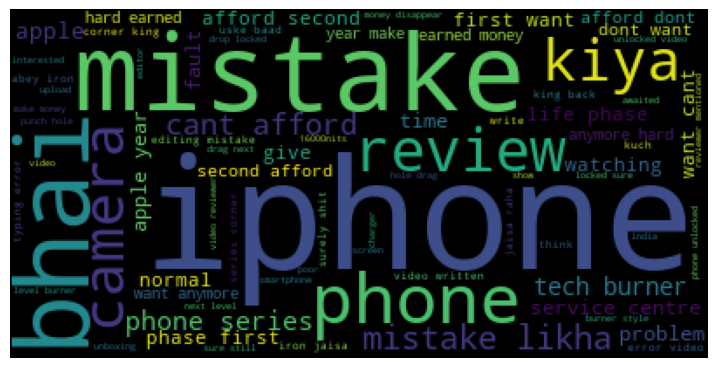

In [74]:
wc(final_data[final_data.Sentiment==0.0].Sentence, 'black')

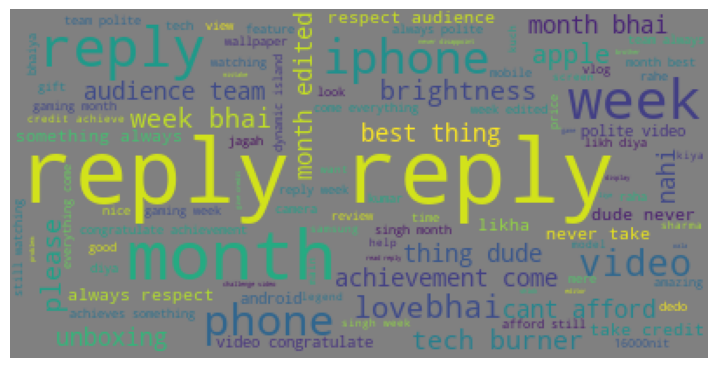

In [71]:
wc(final_data[final_data.Sentiment==2.0].Sentence, 'gray')

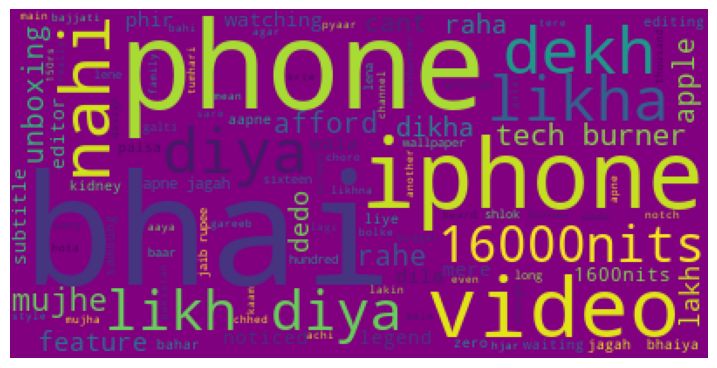

In [75]:
wc(final_data[final_data.Sentiment==1.0].Sentence, 'purple')

## <center><u>Train Test Split for Model Building</u>

In [19]:
from sklearn.model_selection import train_test_split
X = final_data['Sentence']
y = final_data['Sentiment']

X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.3 , random_state = 0)
print("Train:",X_train.shape,y_train.shape,"Test:" ,(X_test.shape,y_test.shape))

Train: (714,) (714,) Test: ((306,), (306,))


## <center><u>Comments Vectorization using TFIDF: </u>

In [20]:
from nltk import corpus
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(ngram_range = (2, 2), analyzer = 'word')
tf_x_train = vectorizer.fit_transform(X_train).toarray()
tf_x_test = vectorizer.transform(X_test).toarray()

## <center><u>Support Vector Machine Modelfor Classification Problem: </u>

In [21]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(tf_x_train,y_train)

y_test_pred_svm =clf.predict(tf_x_test)

from sklearn.metrics import classification_report
report_svm =classification_report(y_test, y_test_pred_svm,output_dict=True)
print(report_svm)

{'0': {'precision': 0.8909090909090909, 'recall': 0.8909090909090909, 'f1-score': 0.8909090909090909, 'support': 55}, '1': {'precision': 0.8070175438596491, 'recall': 0.6301369863013698, 'f1-score': 0.7076923076923077, 'support': 73}, '2': {'precision': 0.8556701030927835, 'recall': 0.9325842696629213, 'f1-score': 0.8924731182795699, 'support': 178}, 'accuracy': 0.8529411764705882, 'macro avg': {'precision': 0.8511989126205078, 'recall': 0.8178767822911274, 'f1-score': 0.8303581722936562, 'support': 306}, 'weighted avg': {'precision': 0.8503972518048035, 'recall': 0.8529411764705882, 'f1-score': 0.8481103056055618, 'support': 306}}
